## Electrocardiogram ##

An electrocardiogram (ECG or EKG) is the electrical activity of the heart. With each beat, an electrical impulse (or “wave”) travels through the heart. This wave causes the muscle to squeeze and pump blood from the heart. A normal heartbeat on ECG will show the timing of the top and lower chambers. 

The right and left atria or upper chambers make the first wave called a “P wave" — following a flat line when the electrical impulse goes to the bottom chambers. The right and left bottom chambers or ventricles make the next wave called a “QRS complex." The final wave or “T wave” represents electrical recovery or return to a resting state for the ventricles.

Sample of ECG signal:

<img src="http://www.wikidoc.org/images/5/53/SinusRhythmLabels.png" alt="ECG sample" width="250" height="250">



## Heart Rate Variablility ##

Heart Rate Variablility (HRV) also known as RR variability is the time difference between two QRS peaks. Calculating and ploting the HRV overtime allows you to determine whether the person stress calm state or a stress.

Hightlighting the time differences:
<img src="https://support.polar.com/support_files/us-en/85256F470048B0BC852577EC004BAA51/1.gif" alt="ECG sample" width="450" height="250">

Graph of HRV and showing the differences in the HRV signal of a someone stressed and calmn. 
<img src="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAjSAAAAJGFlZDY1MTZiLWEwODEtNDFkNy1iYzA2LTE0YzU4YThhMjNhMg.jpg" alt="ECG sample" width="400" height="250">




In [1]:
import numpy as np
import matplotlib.pyplot as plt

def peak_detector(x):
    '''
    Finds the index of the peaks for a signal/vector x
    ARGUMENTS:
        x - A signal/vector 
    OUTPUTS:
        peak_index - A list of index of there the peaks are given x 
    ''' 
    peak_index = []
    x_prev_point = x[0]
    for i in range(len(x)):
        if i == len(x)-1: # there is no value at x[i+1] when i = len(x) and there is no value at i = len(x)
            break
        elif x[i] > x_prev_point and x[i] > x[i+1]:
            peak_index.append(i)
        x_prev_point = x[i]
    return peak_index
    
N_samples = 100

# https://stackoverflow.com/questions/10698858/built-in-range-or-numpy-arange-which-is-more-efficient
x = None # Same as x = range(100). but numpy.range is faster
y = None

# Get Peak indices

# plot data


## Read Electrocardiogram ##

In [2]:
# Helper functions

# inspiration for function covert_time()
#      https://stackoverflow.com/questions/4998629/python-split-string-with-multiple-delimiters
#      https://stackoverflow.com/questions/7501609/python-re-split-vs-split
def covert_time(time_stamps):
    '''
    Converts a list of strings 'mm:ss.mmm' to a list of seconds
    ARGUMENTS:
        time_stamps - A list of time stamps where each time stamps has the format 'mm:ss.mmm' of type string 
    OUTPUTS:
        new_time_stamps - A list of time stamps where each time stamp is in seconds 
    ''' 

    import re
    
    MINUTES_TO_SECONDS = 60    
    time_stamps_seconds = []
    
    for time in time_stamps:
        time = time.replace("'", "")        
        time_split = re.split(':| . ' ,time) 
        time_min = float(time_split[0])
        time_sec = float(time_split[1]) 
        time_stamps_seconds.append(time_min*MINUTES_TO_SECONDS+time_sec)
    return time_stamps_seconds

# Butterworth Bandpass filter function obtained from:
#   https://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [3]:
# PhysioNet offers free web access to large collections of recorded physiologic signals
# Link to the research article: http://physionet.caregroup.harvard.edu/physiobank/database/ptbdb/
# Downloaded data here: https://physionet.org/cgi-bin/atm/ATM

# Pandas is an open source, BSD-licensed library providing high-performance, 
# easy-to-use data structures and data analysis tools for the Python programming language.
# Learn more here: http://pandas.pydata.org/

import pandas as pd 

# read ECG from CSV file
ecg_short_df = None  # dataframe

# get the first five rows for dataframe

In [4]:
# Remove first column (not the header column)
ecg_short_df = None

In [5]:
# convert time stamps from string to seconds (float)
ecg_short_df = None

In [6]:
# Extract ECG and time stampes
time_short = None  # Get the first column
ecg_short = None   # Get the second column

# solution to issue since the first index has strings instead of floats. Read more here:
# https://stackoverflow.com/questions/35109623/numpy-ndarray-object-has-no-attribute-find-while-trying-to-generate-boxplot

# plot Raw ECG signal
'''
plt.plot(time_short, ecg_short)
plt.title('Raw ten second ECG data')
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')
plt.show()
'''

"\nplt.plot(time_short, ecg_short)\nplt.title('Raw ten second ECG data')\nplt.xlabel('time (sec)')\nplt.ylabel('voltage (V)')\nplt.show()\n"

In [7]:
# Filter ECG signal
# upper and lower bandpass obtained from this article:
#   http://www.ems12lead.com/2014/03/10/understanding-ecg-filtering/
lowcut = 0.67
highcut = 50
fs = None # number of samples/ time
ecg_short_filter = None

# plot filtered ECG
"""
plt.plot(time_short, ecg_short_filter)     # show sample [0:2000]
plt.title('Butterworth filter ECG signal ')
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')
plt.show()
"""

"\nplt.plot(time_short, ecg_short_filter)     # show sample [0:2000]\nplt.title('Butterworth filter ECG signal ')\nplt.xlabel('time (sec)')\nplt.ylabel('voltage (V)')\nplt.show()\n"

In [8]:
# threshold signal
THRES = None

# define ecg_short_thres
ecg_short_thres = None

# get the peak values of above threshold
ecg_short_thres = None

# threshold signal 
'''
plot thresholded ECG signal
plt.plot(time_short, ecg_short_thres)
plt.title('threshold of QRS peaks ten')
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')
plt.show()
'''

"\nplot thresholded ECG signal\nplt.plot(time_short, ecg_short_thres)\nplt.title('threshold of QRS peaks ten')\nplt.xlabel('time (sec)')\nplt.ylabel('voltage (V)')\nplt.show()\n"

In [9]:
# plot the filtered ECG with the peaks
peak_index = None
peak_time = None
ecg_peak = None

# filtered signal with peaks highlighted
'''
plt.plot(time_short, ecg_short_filter)
plt.scatter(peak_time, ecg_peak, color='red')
plt.title('Butterworth filter signal with peaks ')
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')
plt.show()
'''

"\nplt.plot(time_short, ecg_short_filter)\nplt.scatter(peak_time, ecg_peak, color='red')\nplt.title('Butterworth filter signal with peaks ')\nplt.xlabel('time (sec)')\nplt.ylabel('voltage (V)')\nplt.show()\n"

## Heart Rate Variability ##

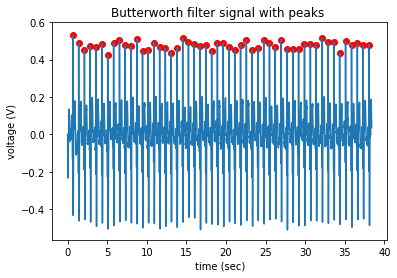

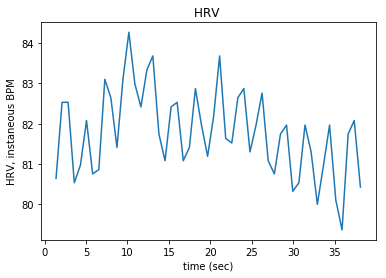

In [10]:

BPM = 60  # beats per minute

# using the method above, applied to new data. 
# This could be written into a function instead of rewriting the code!

# read ECG and remove first column (not the header column)
ecg_full_df = pd.read_csv("s0010_re_full.csv", dtype = "object", low_memory = "False") # there were errors so added parameters
ecg_full_df = ecg_full_df[1:]

# convert time stamps from string to seconds (float)
ecg_full_df.iloc[:,0] = covert_time(ecg_full_df.iloc[:,0])

# full ECG data
time_full= np.array(ecg_full_df.iloc[:,0], dtype=pd.Series)
ecg_full= np.array(ecg_full_df.iloc[:,1], dtype=pd.Series)

ecg_full = ecg_full.astype(np.float)
time_full = time_full.astype(np.float)

# Filter ECG
fs = len(time_full)/time_full[-1]-time_full[0]
ecg_full_filter = butter_bandpass_filter(ecg_full, lowcut, highcut, fs, order=3)

# Find ECG peaks above threshold
THRES = max(ecg_full)*0.60
ecg_full_thres = np.zeros((len(ecg_full_filter)))
ecg_full_thres[ecg_full_filter>THRES] = ecg_full_filter[ecg_full_filter>THRES]    # grab the index and plot that in. 

# Get peaks
peak_index = peak_detector(ecg_full_thres)
peak_time = time_full[peak_index]
ecg_peak = ecg_full_filter[peak_index]

# plot ECG
plt.plot(time_full, ecg_full_filter)
plt.scatter(peak_time, ecg_peak, color='red')
plt.title('Butterworth filter signal with peaks ')
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')
plt.show()

# https://stackoverflow.com/questions/5859144/shift-all-indices-in-numpy-array
# shift time to efficiently find HRV
y = np.roll(peak_time, 1)
y[0] = 0  

hrv = BPM/(peak_time - y)

# plot HRV
plt.plot(peak_time[1:], hrv[1:])
plt.title('HRV ')
plt.xlabel('time (sec)')
plt.ylabel('HRV, instaneous BPM')
plt.show()
